In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.decomposition import PCA

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\Data Science notes\data analytics\ML\winequality-white.csv",sep=';')

In [6]:
df.head(12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

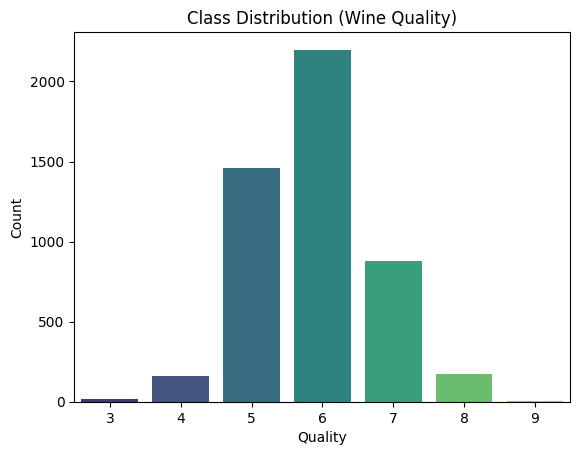

In [28]:
sns.countplot(x="quality", data=df,palette='viridis')
plt.title("Class Distribution (Wine Quality)")
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

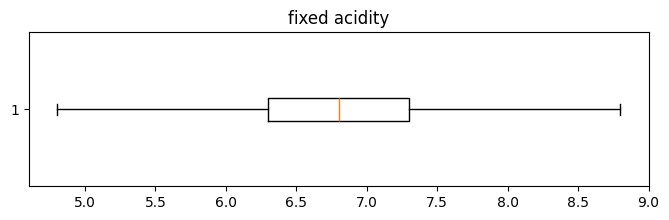

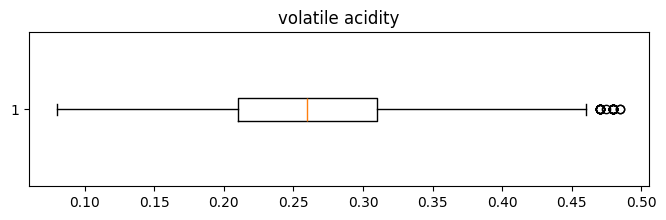

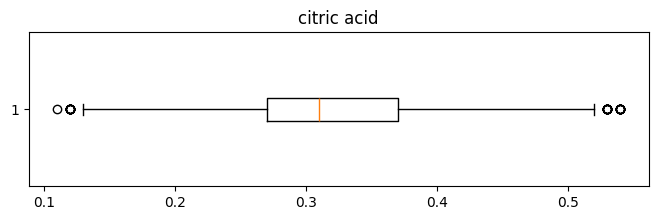

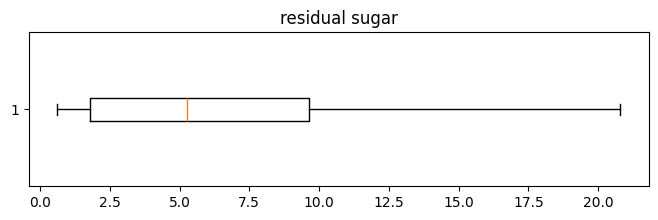

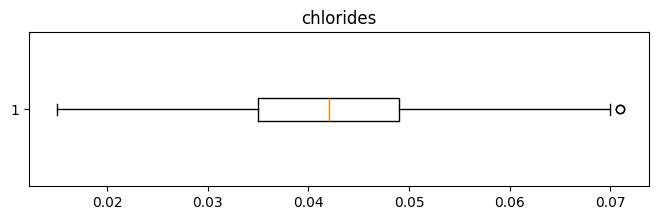

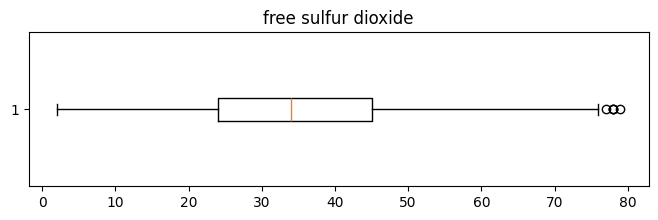

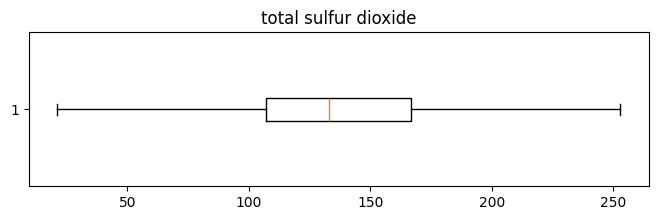

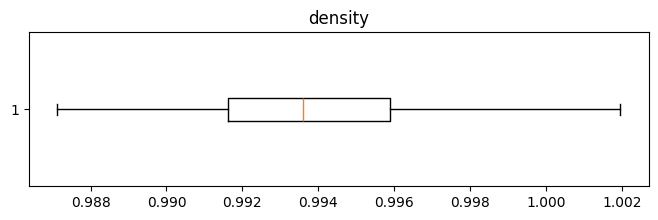

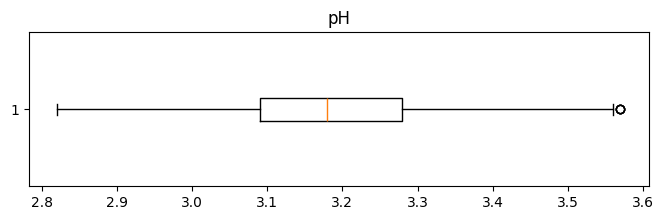

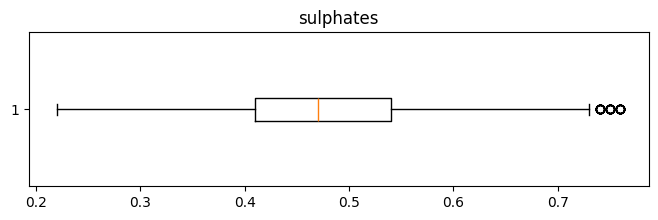

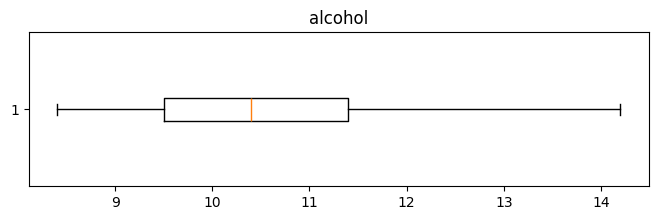

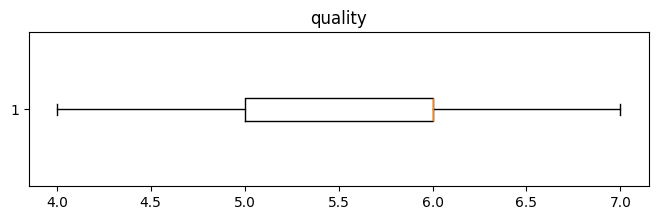

In [12]:
for i in df:
    plt.figure(figsize=(8, 2))
    plt.boxplot(data[i], vert=False)
    plt.title(i)
    plt.show()

In [13]:
def remove_outliers_iqr(df):
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [14]:
data= remove_outliers_iqr(df)

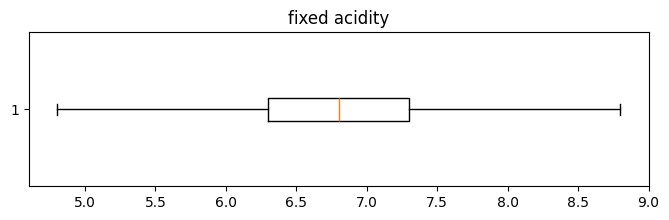

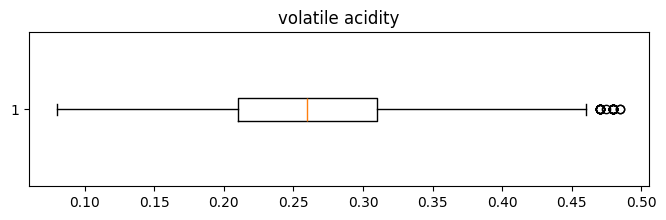

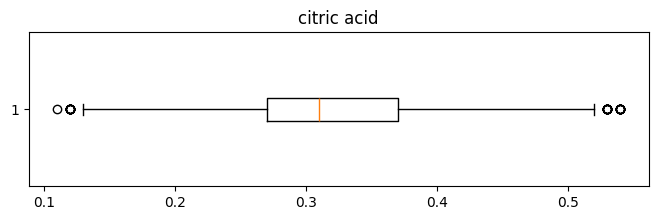

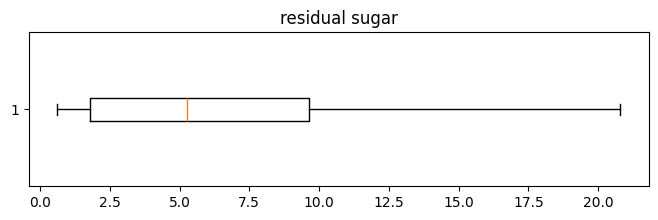

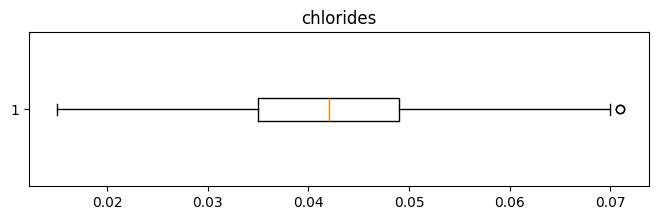

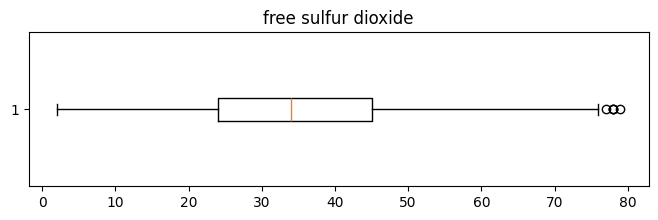

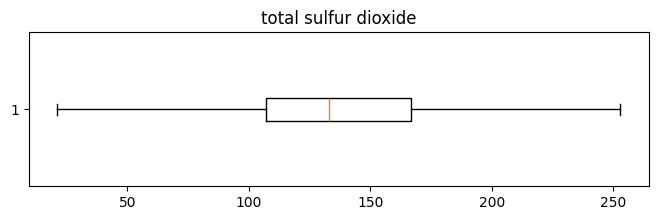

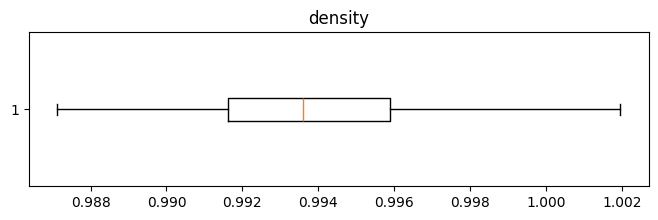

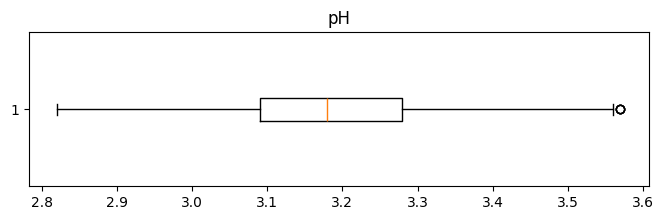

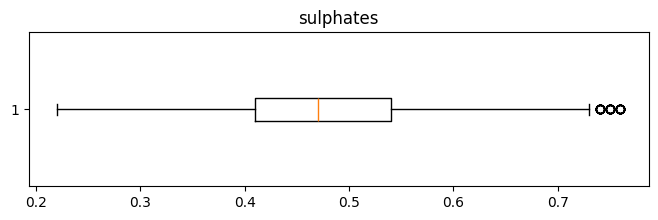

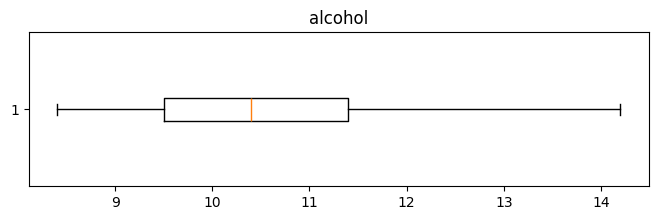

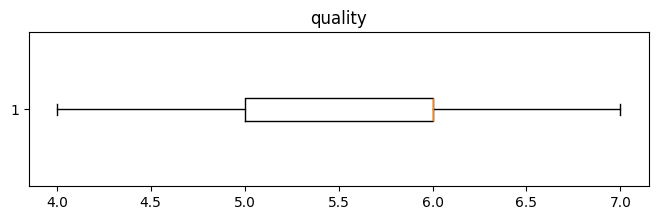

In [15]:
for i in data:
    plt.figure(figsize=(8, 2))
    plt.boxplot(data[i], vert=False)
    plt.title(i)
    plt.show()

In [19]:
data["quality_class"] = (data["quality"] >= 7).astype(int)


In [20]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [21]:
data=data.drop("quality",axis=1)

In [22]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_class
count,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000
mean,6.813460,0.263647,0.322446,6.366999,0.042423,34.702359,137.330013,0.993894,3.187691,0.481942,10.556351,0.207864
std,0.737631,0.075897,0.083689,4.919839,0.009875,15.015001,41.244259,0.002866,0.137928,0.098186,1.194168,0.405832
min,4.800000,0.080000,0.110000,0.600000,0.015000,2.000000,21.000000,0.987110,2.820000,0.220000,8.400000,0.000000
25%,6.300000,0.210000,0.270000,1.800000,0.035000,24.000000,107.000000,0.991625,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.310000,5.250000,0.042000,34.000000,133.000000,0.993600,3.180000,0.470000,10.400000,0.000000
75%,7.300000,0.310000,0.370000,9.625000,0.049000,45.000000,167.000000,0.995900,3.280000,0.540000,11.400000,0.000000
max,8.800000,0.485000,0.540000,20.800000,0.071000,79.000000,253.000000,1.001960,3.570000,0.760000,14.200000,1.000000


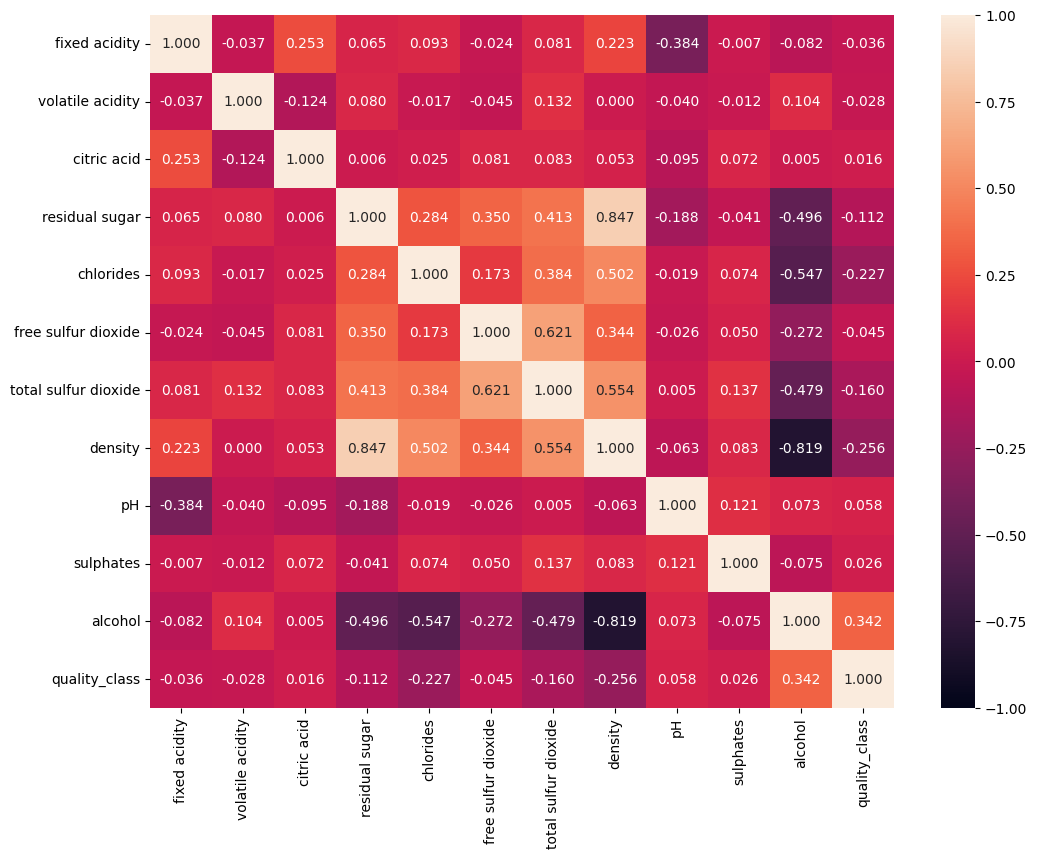

In [23]:
plt.figure(figsize=(12, 9))
sns.heatmap(data.corr() ,annot=True ,fmt=".3f",vmax=1,vmin=-1)
plt.show()

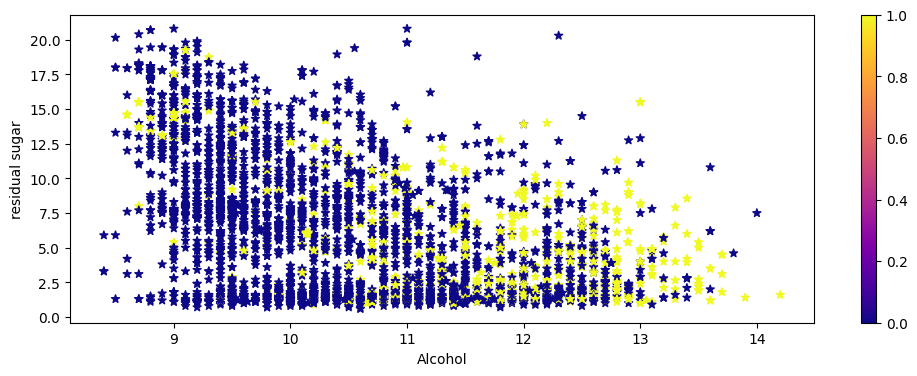

In [25]:
plt.figure(figsize=(12,4))
plt.scatter(data["alcohol"],data["residual sugar"],marker="*",c=data["quality_class"] ,cmap="plasma")
plt.xlabel("Alcohol")
plt.ylabel("residual sugar")
plt.colorbar()
plt.show()

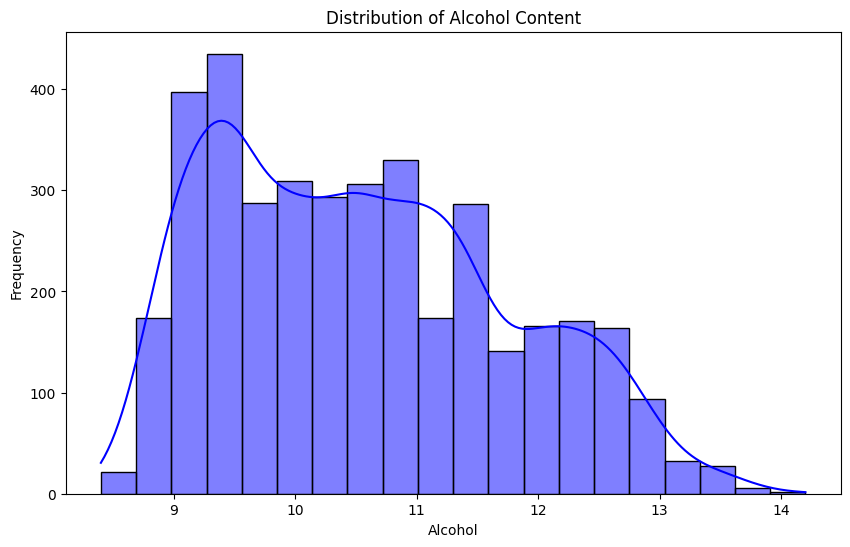

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data['alcohol'], bins=20, kde=True, color='blue')
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()

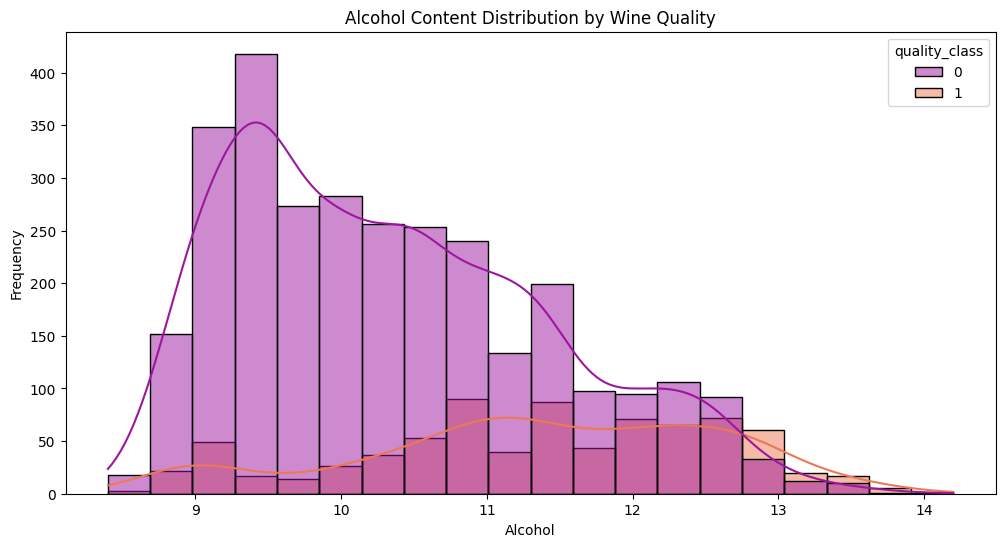

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='alcohol', hue='quality_class', bins=20, kde=True, palette='plasma')
plt.title('Alcohol Content Distribution by Wine Quality')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()

In [32]:
X = data.drop("quality_class",axis=1)
y = data["quality_class"]

In [37]:
scaler = MinMaxScaler()
X_scaled =scaler.fit_transform(X)

In [38]:
X_tr,X_te,y_tr,y_te = train_test_split(X_scaled,y, test_size=0.3 ,random_state=42)

In [39]:
k=5
knn_model=KNeighborsClassifier(n_neighbors=k)


In [40]:
knn_model.fit(X_tr,y_tr)

KNeighborsClassifier()

In [41]:
y_pred =knn_model.predict(X_te)

In [42]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [43]:
accuracy_score(y_te,y_pred)

0.8131004366812227

In [45]:
print(classification_report(y_te,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       898
           1       0.59      0.45      0.51       247

    accuracy                           0.81      1145
   macro avg       0.72      0.68      0.70      1145
weighted avg       0.80      0.81      0.80      1145



In [48]:
cm = confusion_matrix(y_te, y_pred)

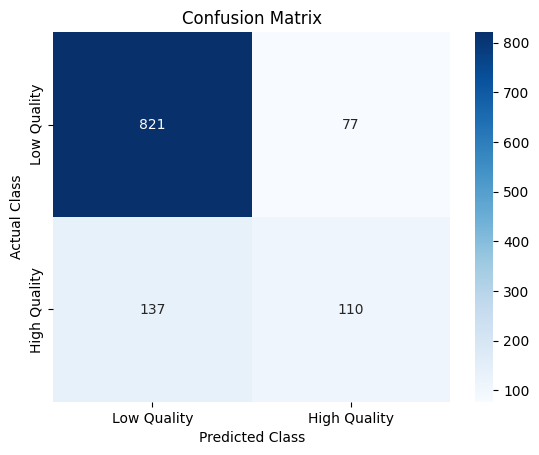

In [49]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Quality", "High Quality"], 
            yticklabels=["Low Quality", "High Quality"])
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()

In [51]:
pca =PCA(n_components=2)

In [52]:
X_reduced =pca.fit_transform(X_scaled)

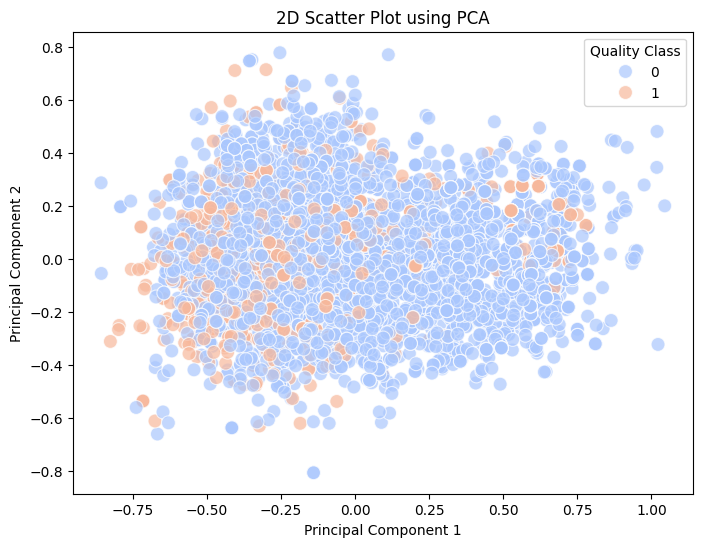

In [53]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette='coolwarm', s=100, alpha=0.7)
plt.title('2D Scatter Plot using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Quality Class')
plt.show()